# Notebook Tutorial Datenvisualisierung mit Matplotlib und Seaborn

Je umfangreicher tabellarisch organisierte Datensammlungen aber werden, desto unübersichtlicher
werden sie auch; die Methode der Datenvisualisierung kann uns dabei helfen, einen raschen Überblick über komplexe Wertverteilungen zu erhalten. 

Über Graphen, Diagramme oder Karten ermöglicht sie uns die Identifikation von Ausreißern, Mustern oder auch Trends. Es handelt sich um einen eigenen Forschungsbereich, den wir hier leider nur anreißen können, aber so viel sei gesagt: Effektive Datenvisualisierungen sind eine Wissenschaft für sich und das richtige Maß zwischen Form und Funktion zu finden, stellt nicht selten eine Herausforderung dar. Alles an einer Visualisierung sollte einem Zweck folgen: die Auswahl des Visualisierungstyps sollte zu den Informationen passen (Linien- oder Balkendiagramm, Heatmap, Histogramm, ...) und Farben, Ausrichtungen, Positionen und Formen einen Aussagewert haben.

Um uns an diesen Bereich heranzutasten, werden wir erst einmal mit der für Python grundlegenden und vielfältigen Bibliothek [**Matplotlib**](https://matplotlib.org/) arbeiten. Sie wurde 2003 erstmals als plattformübergreifendes Visualisierungs-Paket veröffentlicht und wird von Pandas standardmäßig aufgerufen, wenn auf Basis der Pandas-Objekte Visualisierungen erstellt werden sollen. Auf der Website der Bibliothek finden Sie zahlreiche nützliche Tutorials für verschiedene Visualisierungsformen: https://matplotlib.org/tutorials/index.html.

## Import

Zunächst importieren wir die benötigten Python-Bibliotheken. Neben pandas nutzen wir nun auch Matplotlib. 

Wichtig! Damit die Diagramme in Jupyter Notebooks angezeigt werden, muss der Magic-Commant `%matplotlib inline ausgeführt` werden.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Einfacher Linienplot

Nutzer:innen können mit Matplotlib zwei leicht unterschiedliche Wege wählen, um  verschiedene Diagrammtypen zu plotten. Wir werden hier kurz beide Varianten vorstellen, werden aber im Weitern die zuerst dargestellte Option durchgängig nutzen, da diese aus unserer Sicht mehr Flexibilität bietet. Wir nutzen `fig, ax`, um zunächst eine *figure* anzulegen, auf der dann unterschiedliche Bereiche *axes* als *subplots* angelegt werden können. Die zweite Variante nutzt mit `plt` zusammen mit der entsprechenden Methoden einen etwas einfacheren, direkteren Weg - bietet aber nicht alle Möglichkeiten, um z.B. mehrere Plots in einer Grafik zu platzieren.

Grundsätzlich brauchen wir immer Werte für die x-Achse und die gleiche Anzahl an Werten für die y-Achse. Diese Werte werden in Form von Listen der `plot()` Methode übergeben. In unserem Beispiel und der Variante, die wir weiter nutzen wollen, nutzen wir dies auf dem `ax`-Objekt. Davor haben wir aber die *figure* und eine *axes* mit `plt.subplots()` angelegt. Mit der letzten Zeile lassen wir die Grafik anzeigen. 

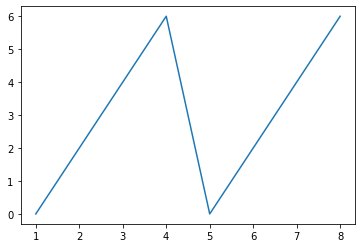

In [6]:
x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = [ 0, 2, 4, 6, 0, 2, 4, 6 ]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Hier nun die gleiche Grafik mit der anderen 'Schreibvariante', auf die Sie sicherlich auf treffen werden.

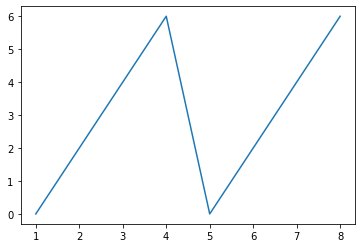

In [9]:
plt.figure()
plt.plot(x, y)
plt.show()

## Einlesen der Daten

Im letzten Kapitel haben wir bereits schnelle Visualsierungen nur mit pandas erstellt. Nun wollen wir diese Datenvisualisierungen mit Hilfe von Matplotlib etwas solider, besser lesbar und ansprechender gestalten. Dazu lesen wir unsere bekannte Datengrundlage wieder ein.

In [8]:
df = pd.read_json('240301-AvH-letters-with-tokens.json')
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date'], unit='ms')
print(df.shape)
df.head(3)

(296, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
0,https://edition-humboldt.de/H0002655,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1793-12-05,http://sws.geonames.org/6556797,Berg,"Berg , den 5 . Dez Dezember 1793 Ihr Brief, li...","[berg, den, 5, dez, dezember, 1793, ihr, brief...",252
1,https://edition-humboldt.de/H0002730,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1794-02-06,http://sws.geonames.org/2951825,Bayreuth,"Der Ueberbringer dieses Briefchens, lieber Soe...","[der, ueberbringer, dieses, briefchens, lieber...",143
2,https://edition-humboldt.de/H0002729,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-07,http://sws.geonames.org/2951825,Bayreuth,"Verehrungswerther Freund, Ich will Ihnen ein B...","[verehrungswerther, freund, ich, will, ihnen, ...",591


## Visualisierung verschiedener Diagramme

### Balkendiagramm

Zunächst möchten wir ein Balkendiagramm erstellen, das eine Übersicht über die zehn häufigsten Adressorten bietet. Dafür möchten wir die Größe der Grafik über den Parameter `figsize=` anpassen. Außerdem setzen wir einen Titel sowie Achsenbeschriftung und deren Schriftgröße fest. Und ganz wichtig: Wir bringen die Balken in eine absteigende Reihenfolge. 

Probieren Sie gerne verschiedene Werte bei den unterschiedlichen Parametern aus und schauen Sie, wie sich die Visualisierung verändert. 

Matplotlib bietet eine Fülle von Möglichkeiten, die Visualisierungen nach eigenen Wünschen und Bedarfen anzupassen. Ein Blick in die [Dokumentation](https://matplotlib.org/stable/api/index.html) hilft hier weiter und viele Anregungen zur Ausgestaltung von Visualisierungen erhält man über die Beispiel in der [Matpltolib-Galerie](https://matplotlib.org/stable/gallery/index.html)

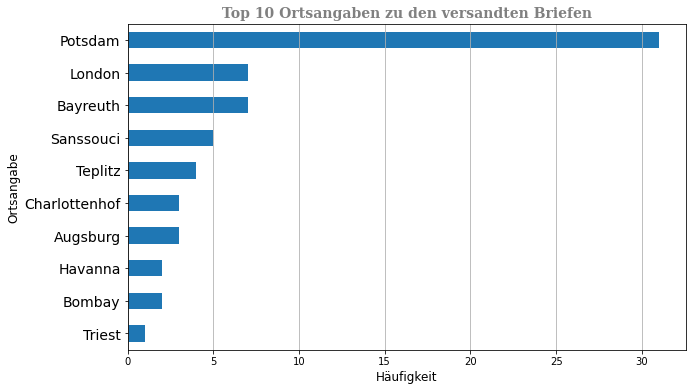

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

# Erstellen der zu plottenden Series 
df_top_places = df.loc[:, 'place'].value_counts()

# Auswahl der 10 häufigsten Orstangabe, Definition als Balkendiagramm, Zuweisung der ax
df_top_places.head(10).plot(kind='barh',
                            ax=ax)

# Formatierung der Überschrift des Diagramms
ax.set_title(label='Top 10 Ortsangaben zu den versandten Briefen',
             family='serif',
             color='grey',
             weight='semibold',
             size=14
             )

# Formatierung und Beschriftung von x-Achse und y-Achse
ax.set_xlabel('Häufigkeit',
              size=12
             )

ax.set_ylabel('Ortsangabe',
              size=12,
             )

# Beschriftung der Features vergrößern
ax.set_yticklabels(ax.get_yticklabels(), 
                   size=14)

# Reihenfolg der Balken invertieren
ax.invert_yaxis()

# Zeichnen nur der Gitterlinien der x-Achse
ax.xaxis.grid(True)

plt.show()

Für die Spalten `sender` und `receiver` können wir äquivalent vorgehen - allerdings müssen wir natürlich die Beschriftungen entsprechend anpassen. 

**Aufgabe**: Erstellen Sie jeweils ein Diagramm zur Übersicht der häufigsten Absender und Empfänger der Briefe.

In [ ]:
# your code

### Histogramm

Über ein Histogramm können wir eine Übersicht über die Verteilung der Brieflänge erhalten. Wir werden `axes`-Objekte nutzen, um unterschiedliche Histogramme mit verschiedenen Größe der *bins*, also der Anzahl der Abschnitte, in die die Werte eingeordnet werden sollen, zu plotten. Beim Erstellen der *subplots* geben wir daher mit `nrows=`, die Anzahl der Zeilen an, in denen jeweils ein Histogramm zu sehen sein wird. Zusätzlich geben wir auch an, dass alle Unterdiagramme die gleichen x- bzw. y-Skalen nutzen. Bei den einzelnen 'plot'-Befehlen nutzen wir den Paramter `ax` und die Indexierung, um die einzelnen Diagramme in eine der Zeilen zu platzieren.

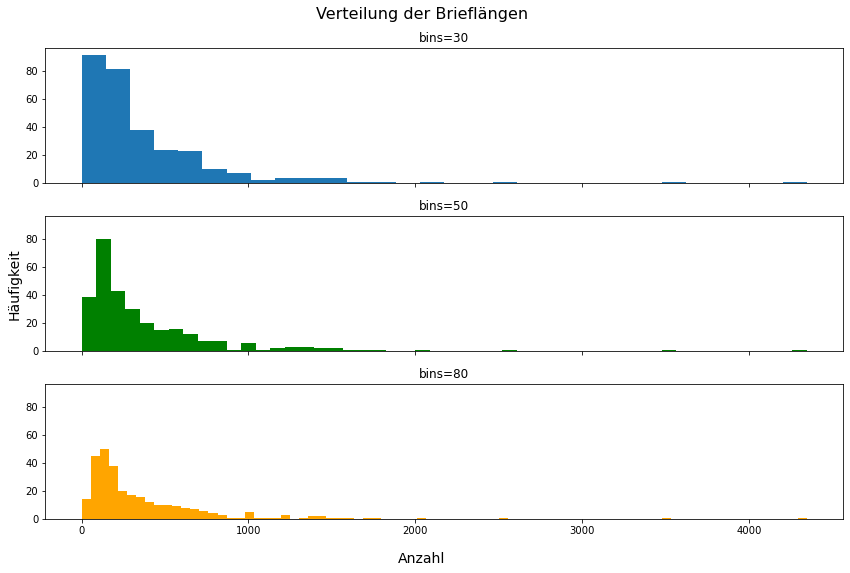

In [42]:
fig, ax = plt.subplots(nrows=3, 
                       figsize=(12,8), 
                       sharex=True,
                       sharey=True)

df.loc[:, 'nr_token' ].plot(kind='hist', 
                            bins=30, 
                            title='bins=30',
                            ax=ax[0])

df.loc[:, 'nr_token' ].plot(kind='hist', 
                            bins=50, 
                            title='bins=50',
                            ax=ax[1],
                            color='green')

df.loc[:, 'nr_token' ].plot(kind='hist', 
                            bins=80, 
                            title='bins=80',
                            ax=ax[2],
                            color='orange')

# einzelne ylabel für die Unterdiagramme ausschalten
for x in range(3):
    ax[x].set_ylabel(ylabel='')

# Beschriftungen des Gesamtdiagramms
fig.suptitle('Verteilung der Brieflängen',
             size=16)

fig.supylabel('Häufigkeit',
           size=14)

fig.supxlabel('Anzahl',
           size=14)

fig.tight_layout()

plt.show;

## Durchschnittliche Brieflänge nach Jahren

Wenn wir unsere vorliegenden Daten nach Jahren aufbereiten wollen, haben wir ein Problem, das wir schon bemerkt haben: Nicht für jedes Jahr sind Briefe, also auch Daten, vorhanden. Wenn wir unsere gruppierten Dataframes visualisieren lassen, dann werden nur die Daten zu den darin enthaltenen Jahren gemacht. Wir benötigen also ein Weg, um auch die Jahre mit in unsere Visualisierung aufzunehmen, die nicht im Dataframe enthalten sind. 

Dazu erstellen wir zunächst aus einem Dictionary einen Dataframe. Das Dictionary hat nur den key `year` und somit hat der Dataframe nur die Spalte `year`. Die Werte dieser Spalte sind die Jahre zwischen 1796 und 1860, die wir als values des Dictionaries mit der `range()`-Funktion übergeben.

Als nächstes gruppieren wir mit Hilfe der Datumspalte nach Jahren und nutzen mit der Methode `agg()`  zwei Spalten, die wir aggregieren wollen: Zum einen die Spalte `nr_token` bei der wir den Durschschnitt bilden und zum anderen nutzen wir die Spalte `sender`, um mit `size` die Anzahl der Brief pro Jahr zu bestimmen. Danach ergänzen wir bei diesem Dataframe noch die Spalte `year`, die wir aus dem Index des Dataframes, der durch die Gruppierung nach Jahren eine Time-Index enthält. Dann geben wir die Dimensionalität und die ersten Zeilen dieses Dataframes aus.

In [76]:
all_years = pd.DataFrame({'year': range(1796, 1860)})

In [102]:
df_grouped = df.groupby(df.loc[:, 'date'].dt.to_period('Y')).agg({'nr_token': 'mean',
                                                                  'sender': 'size'})

In [117]:
df_grouped.loc[:, 'year'] = df_grouped.index.year

print(df_grouped.shape)
df_grouped.head()

(47, 3)


,nr_token,sender,year
date,,,
1793,252.000000,1,1793
1794,143.000000,1,1794
1795,544.333333,3,1795
1796,844.800000,5,1796
1801,2314.000000,2,1801


Jetzt *mergen* wir die zwei Dataframes, um tatsächlich die Werte aller Jahre in der Visualisierung anzeigen zu können. Über den Parameter `on='year'` mergen wir über die in beiden Dataframes enthaltenen Spalte `year` den Dataframe mit allen Jahreszahlen mit den ausgewählten Spalten des Dataframes der die Grupperung nach Jahren enthält. Die leeren Werten füllen wir mit `fillna` mit dem Wert '0' auf. Anschließend zeigen wir den Dataframe an, der nun alle 64 Jahre zwischen 1796 und 1860 sowie die drei Spalten `year`, `nr_token` und `sender` enthält.

In [133]:
df_all_years = pd.merge(all_years, 
                        df_grouped.loc[:, ['year', 'nr_token', 'sender']], 
                        on='year', 
                        how='left').fillna(0)

In [134]:
print(df_all_years.shape)
df_all_years.head()

(64, 3)


,year,nr_token,sender
0,1796,844.8,5.0
1,1797,0.0,0.0
2,1798,0.0,0.0
3,1799,0.0,0.0
4,1800,0.0,0.0


Nun können wir die Daten nach Jahren - und zwar nach allen Jahren - plotten. Wir nutzen wieder eine *figure*, setzen aber zwei *axes* darauf. Eine Zeile zeigt die durchschnittliche Länge der Briefe an, das andere Balkendiagramm zeigt die Anzahl der Brief pro Jahr. Auf diese Weise können wir direkt den Bezug zwischen durchschnittlicher Brieflänge und Anzahl pro Brief herstellen. Was fällt Ihnen z.B. für das Jahr 1848 auf. Die Einstellungen zu den jeweiligen Beschriftungen des Diagramm sollte aus dem nachfolgenden Codeblock hervorgehen.

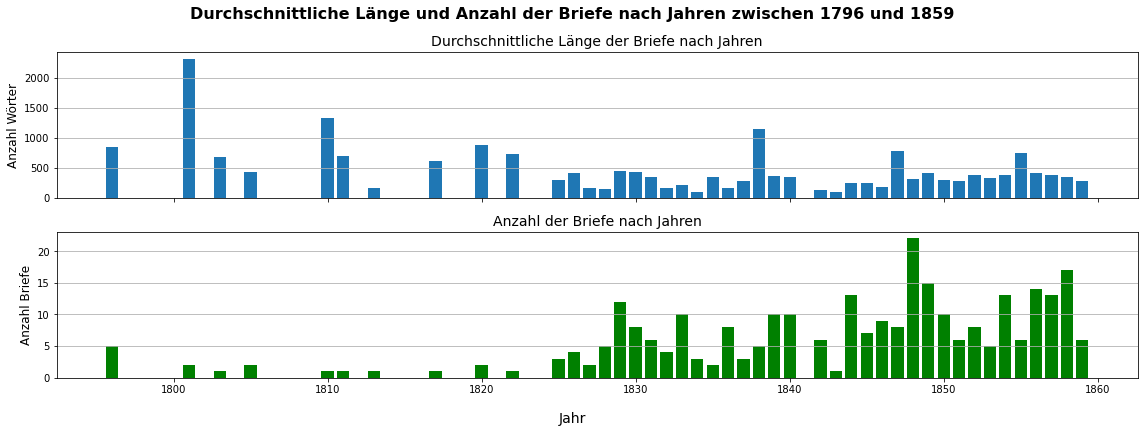

In [130]:
fig, ax = plt.subplots(nrows=2, 
                       figsize=(16, 6),
                       sharex=True)

# Balkendiagramme plotten
ax[0].bar(df_all_years.loc[:,'year'], df_all_years.loc[:, 'nr_token'])
ax[1].bar(df_all_years.loc[:,'year'], df_all_years.loc[:, 'sender'], color='green')

# Gitternetzlinien einblenden
ax[0].yaxis.grid(True)
ax[1].yaxis.grid(True)

# Titel der einzelnen Diagramme
ax[0].set_title('Durchschnittliche Länge der Briefe nach Jahren',
                size=14)
ax[1].set_title('Anzahl der Briefe nach Jahren',
                size=14)

# Beschriftung der y-Achse der einzelnen Diagrmme
ax[0].set_ylabel('Anzahl Wörter', 
                 size=12)
ax[1].set_ylabel('Anzahl Briefe', 
                 size=12)

# Beschriftungen des Gesamtdiagramms
fig.suptitle('Durchschnittliche Länge und Anzahl der Briefe nach Jahren zwischen 1796 und 1859',
             size=16,
             weight='bold')

fig.supxlabel('Jahr',
           size=14)

fig.tight_layout()

plt.show;